UNAD
Angel De Jesus Sepulveda Gonzales– Dataset Arboles de Decisión – Red Wine Quality: 

In [49]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [7]:
BASE_Datos = pd.read_csv('winequality-red.csv')

In [89]:
BASE_Datos.head(20)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [91]:

BASE_Datos.shape

(1599, 12)

In [93]:
BASE_Datos.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [95]:
BASE_Datos.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

(array([151., 855., 416., 118.,  32.,  15.,   4.,   4.,   0.,   4.]),
 array([0.33 , 0.497, 0.664, 0.831, 0.998, 1.165, 1.332, 1.499, 1.666,
        1.833, 2.   ]),
 <BarContainer object of 10 artists>)

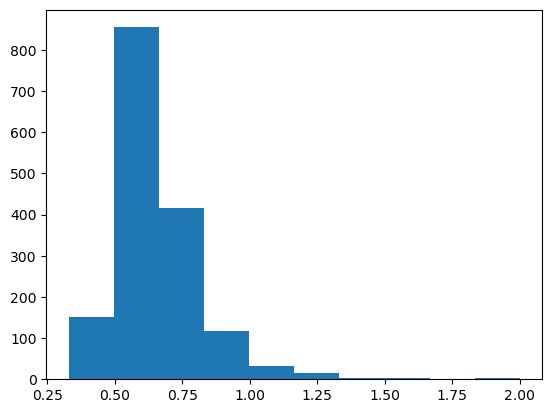

In [97]:

plt.hist(BASE_Datos.sulphates)

se puede visualizar en histograma que el dataset no se encuentr equilibrado 

<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>

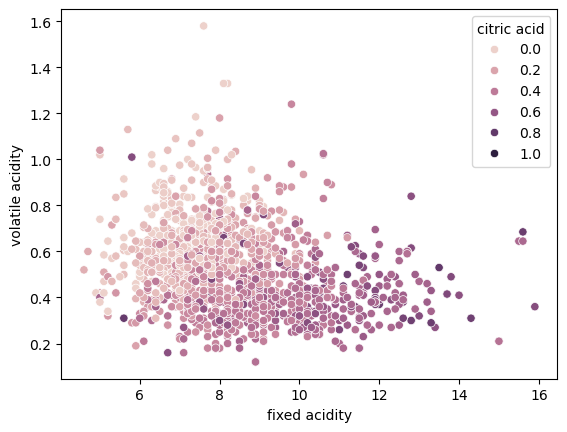

In [101]:
import seaborn as sns

sns.scatterplot(x="fixed acidity", y="volatile acidity", hue="citric acid", data=BASE_Datos)



<function matplotlib.pyplot.show(close=None, block=None)>

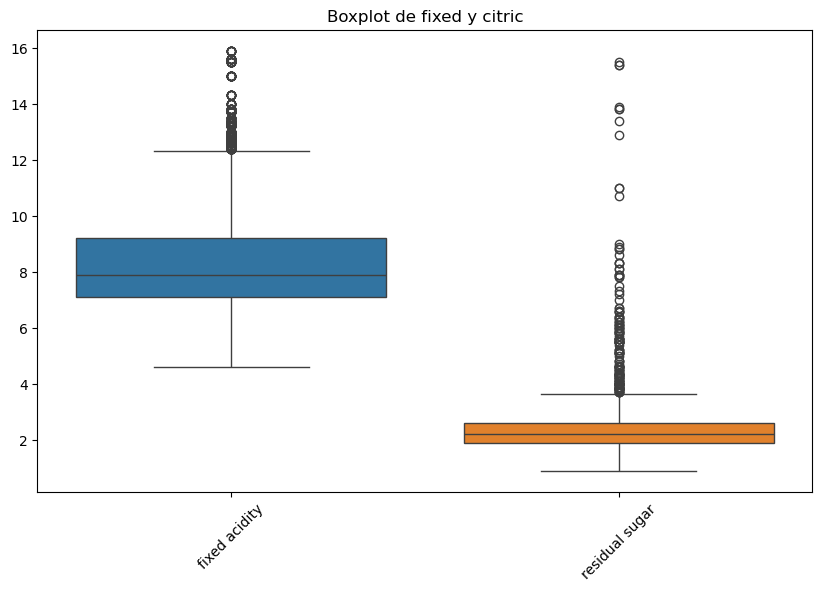

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=BASE_Datos[['fixed acidity', 'fixed acidity', 'fixed acidity', 'residual sugar']])
plt.xticks(rotation=45)
plt.title('Boxplot de fixed y citric')
plt.show




In [11]:
predictors_col = ["fixed acidity", "residual sugar"]
target_col = ["alcohol"]

predictors = BASE_Datos[predictors_col]
target = BASE_Datos[target_col]

In [109]:

predictors

,fixed acidity,fixed acidity,fixed acidity,residual sugar
0,7.4,7.4,7.4,1.9
1,7.8,7.8,7.8,2.6
2,7.8,7.8,7.8,2.3
3,11.2,11.2,11.2,1.9
4,7.4,7.4,7.4,1.9
...,...,...,...,...
1594,6.2,6.2,6.2,2.0
1595,5.9,5.9,5.9,2.2
1596,6.3,6.3,6.3,2.3
1597,5.9,5.9,5.9,2.0


In [111]:

target

,alcohol
0,9.4
1,9.8
2,9.8
3,9.8
4,9.4
...,...
1594,10.5
1595,11.2
1596,11.0
1597,10.2


In [113]:
corr = predictors.corr()
corr

,fixed acidity,fixed acidity,fixed acidity,residual sugar
fixed acidity,1.000000,1.000000,1.000000,0.114777
fixed acidity,1.000000,1.000000,1.000000,0.114777
fixed acidity,1.000000,1.000000,1.000000,0.114777
residual sugar,0.114777,0.114777,0.114777,1.000000


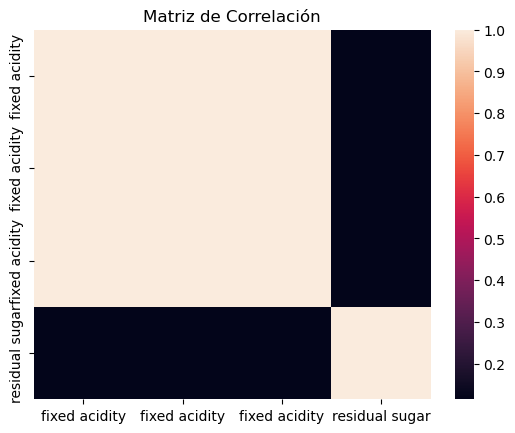

In [115]:
sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show()

In [35]:
X = BASE_Datos[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", 
                "chlorides", "density", "pH", "sulphates"]]
y = BASE_Datos["alcohol"]

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [43]:
from sklearn.tree import DecisionTreeRegressor

arbol = DecisionTreeRegressor()
arbol.fit(X_train, y_train)

DecisionTreeRegressor()

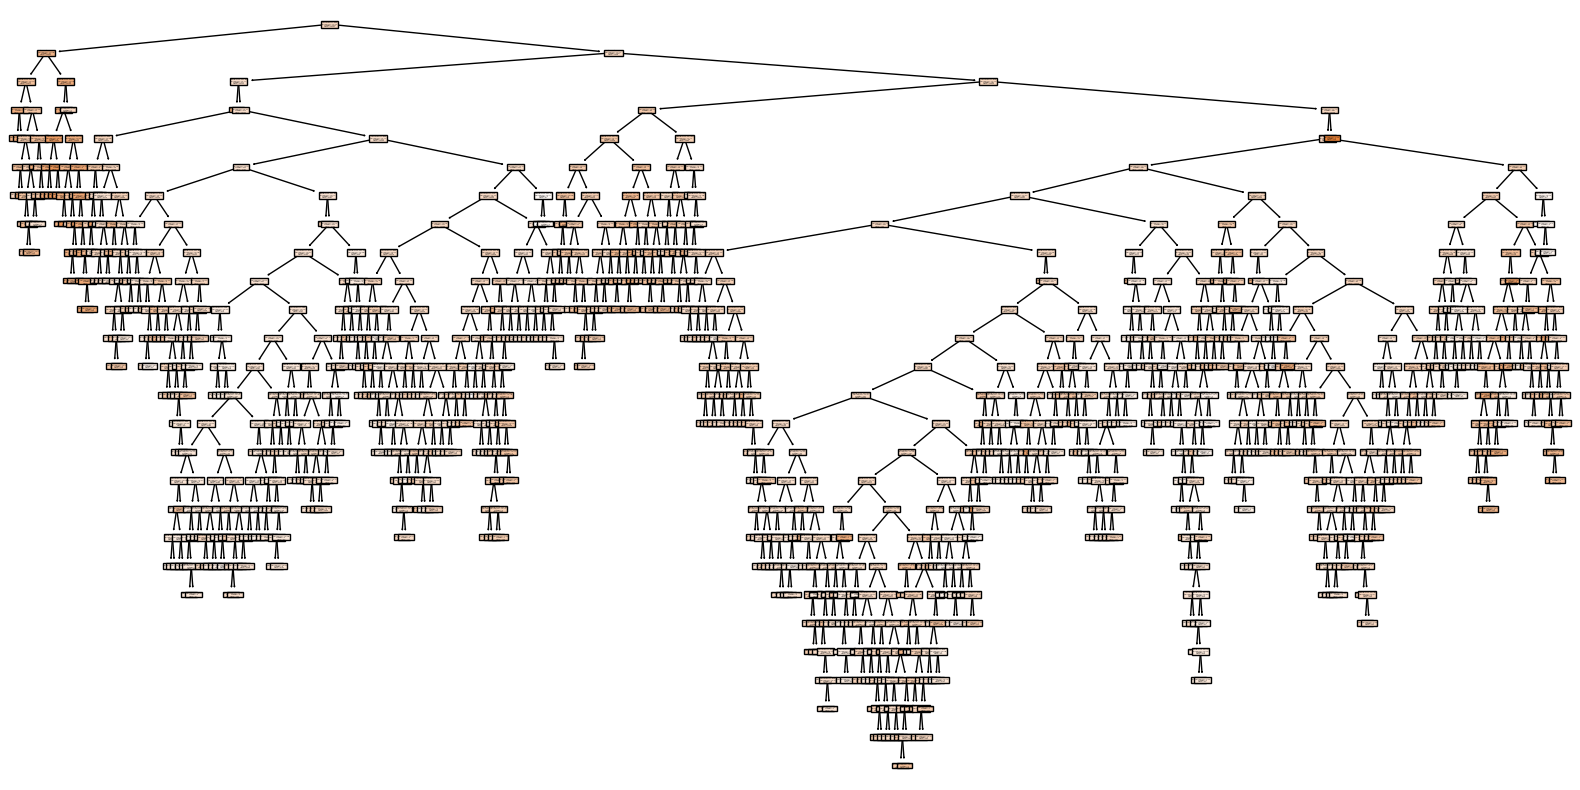

In [41]:
#Vamos a graficar el arbol

plt.figure(figsize=(20,10))
plot_tree(arbol, filled=True, feature_names=X_train.columns)
plt.show()

In [47]:

predicciones = arbol.predict(X_test)


In [51]:
mae = mean_absolute_error(y_test, predicciones)
mse = mean_squared_error(y_test, predicciones)
r2 = r2_score(y_test, predicciones)

print(f"Error Absoluto Medio (MAE): {mae}")
print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"R2 Score: {r2}")

Error Absoluto Medio (MAE): 0.4800520833333334
Error Cuadrático Medio (MSE): 0.6003289930555555
R2 Score: 0.41450965338769297


#7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

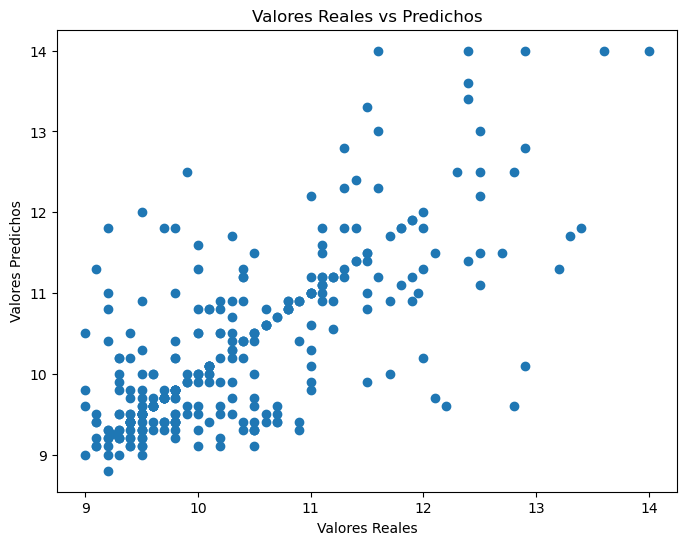

In [54]:
#grafica de dispersion

plt.figure(figsize=(8,6))
plt.scatter(y_test, predicciones)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs Predichos')
plt.show()

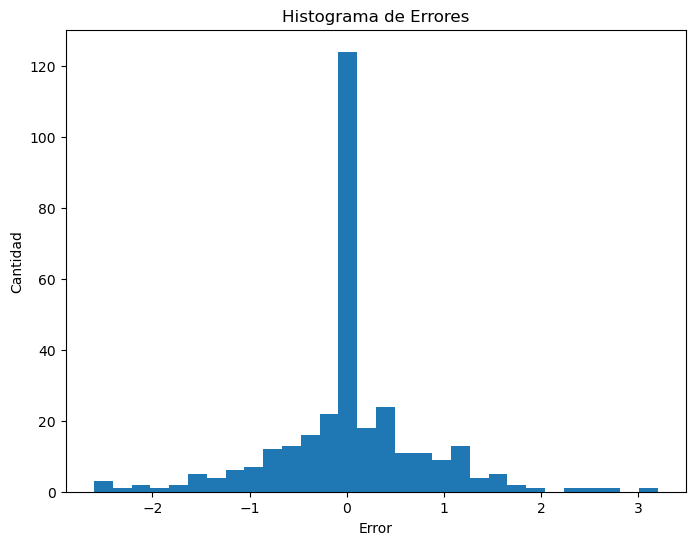

In [56]:
#grafica de histograma de errores

errores = y_test - predicciones

plt.figure(figsize=(8,6))
plt.hist(errores, bins=30)
plt.xlabel('Error')
plt.ylabel('Cantidad')
plt.title('Histograma de Errores')
plt.show()

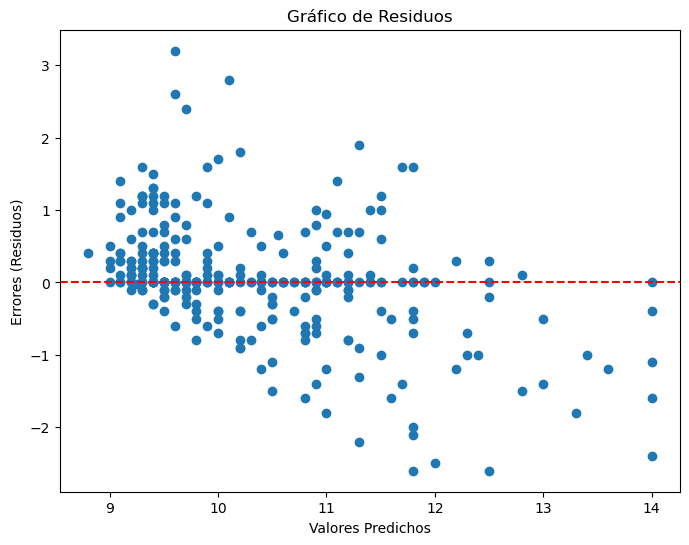

In [58]:
#grafica de residuos

plt.figure(figsize=(8,6))
plt.scatter(predicciones, errores)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Errores (Residuos)')
plt.title('Gráfico de Residuos')
plt.show()

#8. Interpretar, analizar y documentar los resultados obtenidos.

Lo primero que hicimos fue evaluar que tan bien funciona el modelo usando las tres metricas, encontramos que:

- En MAE (Error Absoluto Medio): el modelo en promedio se equivoca en 0.48 unidades cuando predice el nivel de alcohol. No es un error enorme, considerando que los niveles de alcohol en el los datos del dataset estan entre 8 y 14.

- MSE (Error Cuadrático Medio): Nos muestra un error cuadratico medio de 0.60, que mide errores mas grandes, como no es un numero grande, indica que no tiene errores extremos.

- R² Score: Mide qué tanto de la variación de los datos logra explicar el modelo. El arbol logra explicar el 41% de la variabilidad del nivel de alcohol en los vinos, por lo que un 41% significa que si encontro relaciones entre las caracteristicas del vino (como la acidez y el azucar) y el nivel de alcohol, pero aun asi podria mejorar.


Ya con esto en mente, con los gráficos, podemos analizar visualmente cómo se comportó el modelo:

- Grafico de dispersion: vemos que los puntos no estan exactamente sobre una linea recta, pero si tiene una tendencia, esto significa que el modelo si captura una relacion entre variables y alcohol, aunque comente errores.

- Histograma de errores: la mayoría de los errores están cerca de 0, aunque existen algunos errores más grandes.

- Gráfico de residuos: por ultimo aqui los errores se dispersan de manera algo aleatoria, alrededor de la linea 0, pero no forman patrones muy claros.


Este modelo de Árbol de Decisión entrenado en conclusion logró predecir el nivel de alcohol de los vinos con un error promedio moderado (MAE de 0.48) y logró explicar el 41% de la variabilidad de los datos. Aunque el desempeño no es perfecto, es aceptable para un primer intento sin tener alguna optimizacion adicional. Los errores se distribuyen de manera razonable y los gráficos no muestran patrones graves, lo que indica que el modelo está funcionando, pero podría mejorarse ajustando parámetros o incluyendo más variables.